In [1]:
# RBE calculation by MKM model
# module import

import numpy as np
import sympy as sp
from scipy.integrate import simps
import math
import os
import matplotlib.pyplot as plt
import pandas as pd
import tkinter as tk
from tkinter import filedialog

ModuleNotFoundError: No module named 'sympy'

密度に関して考える必要があるか。
結局細胞に与えるダメージなので、関係なさそう。

In [25]:
# 関数定義
def microdosimetric_distribution(file_path):
    with open(file_path, errors = 'ignore') as f:
        # data = f.readlines()
        data = []
        reading = False
        for line in f:
            if line.startswith('#  sed-lwr'):
                reading = True
                continue
            elif line.startswith('   9.2612E+03   1.0000E+04   0.0000E+00  0.0000'):
                reading = False
                break
            if reading:
                elements = line.split()
                data.append(elements)

        return data

def read_dose_mean(file_path):
    mean_dose = []
    with open(file_path) as f:
        data = f.readlines()
        for index, line in enumerate(data):
            if '#               Dose mean    ' in line:
                mean_dose.append(float(data[index].split()[3]))

    return mean_dose

def read_frequency_mean(file):
    mean_frequency = []
    with open(file) as f:
        data = f.readlines()
        for index, line in enumerate(data):
            if '#          Frequency mean' in line:
                mean_frequency.append(float(data[index].split()[3]))

    return mean_frequency

[7.815, 8.496, 9.969, 14.581, 56.403, 224.35, 6.8555]
[16.899, 19.496, 23.315, 39.625, 153.94, 421.2, 33.928]
[[0.8991, 0.9014910168549731, 0.9041084141006948, 0.9069822861228056, 0.9099602765926145, 0.9132715628832266, 0.9167770837276801, 0.9206451235902532, 0.9247212901829203, 0.9290332280860022, 0.9337634608243593, 0.938743928126209, 0.9441060551773558, 0.9497843158942594, 0.9559516492522024, 0.9625272744521393, 0.9697173817542832, 0.9776234777184084, 0.9863856723016251, 0.9962314188010329, 1.0073466046190969, 1.0197928929148625, 1.0337417077812887, 1.049183694424479, 1.066200710029162, 1.0849124455077868, 1.1054863792072207, 1.1280450190726776, 1.1525591698729158, 1.1485552628169136, 1.14, 1.1315984441563252, 1.1235097349686938, 1.1158153943919296, 1.1086508753861999, 1.1028750510968797, 1.0989336866679287, 1.0976450651551453, 1.079012880181838, 1.0303212549491305, 0.9821760118826588, 0.9340583759618278, 0.8860623432461482, 0.8382553552335655, 0.7908215529604589, 0.7438889415931442

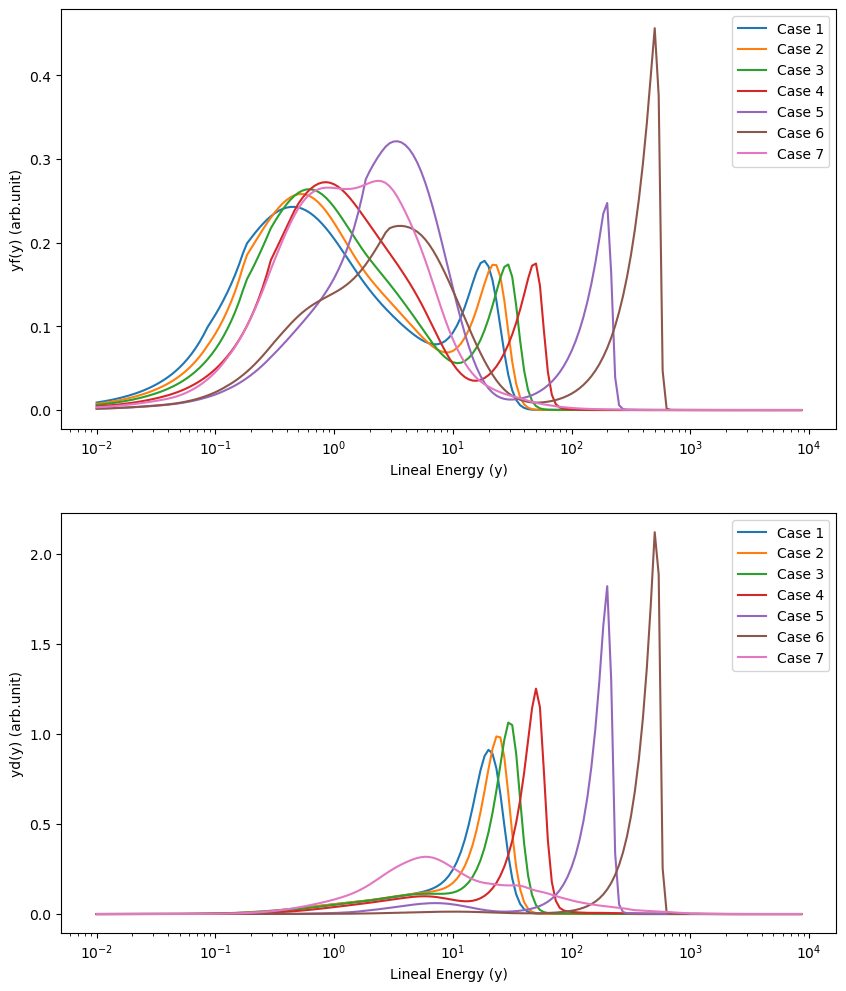

In [26]:
# absorbed dose
# 今は仮の値。PHITSから計算できる。
dose = 10

# lineal energy, y and frequency distribution, f(y)
# PHITSから。
# y = np.linspace(1e-2,1e4,180)
# Plot using subplots
fig, axs       = plt.subplots(2, 1, figsize=(10, 12))
frequency_mean          = []
frequency_distributions = []
dose_mean               = []
dose_distributions      = [] 
# f(y) の計算
# folder      = r'C:\Python\data\microdosimetry\proton\step2\PMMA'
# folder      = r'C:\Python\data\microdosimetry\proton\step2\Ti\Titanium'
folder      = r'C:\Python\data\microdosimetry\carbon_ion\PMMA\150MeV\step2'
# PMMA 同士で比較
for i in range(1,8):
    file_path   = os.path.join(folder, 'case'+str(i), 'yfy_PMMA.out')
    data        = microdosimetric_distribution(file_path)
    mean_frequency = read_frequency_mean(file_path)  
    frequency_mean.append(mean_frequency[0])  
    # microdosimetric quantities
    # f(y)
    yfy_distribution       = [float(item[2]) for item in data]
    lineal_energy          = [float(item[0]) for item in data]
    frequency_distribution = [yfy_distribution[i]/lineal_energy[i] for i in range(len(lineal_energy))]
    frequency_distributions.append(frequency_distribution)
    axs[0].plot(lineal_energy, yfy_distribution, label=f'Case {i}')

    #d(y)
    file_path   = os.path.join(folder, 'case'+str(i), 'ydy_PMMA.out')
    data        = microdosimetric_distribution(file_path)
    mean_dose   = read_dose_mean(file_path)
    ydy_distribution  = [float(item[2]) for item in data]
    dose_distribution = [ydy_distribution[j]/lineal_energy[j] for j in range(len(lineal_energy))]
    dose_mean.append(mean_dose[0])
    dose_distributions.append(dose_distribution)
    axs[1].plot(lineal_energy, ydy_distribution, label=f'Case {i}')

axs[0].set_xscale('log')
# axs[0].set_yscale('log')
axs[0].set_xlabel('Lineal Energy (y)')
axs[0].set_ylabel('yf(y) (arb.unit)')
axs[0].legend()
# axs[0].grid(True)

axs[1].set_xscale('log')
# axs[1].set_yscale('log')
axs[1].set_xlabel('Lineal Energy (y)')
axs[1].set_ylabel('yd(y) (arb.unit)')
axs[1].legend()
# axs[1].grid(True)

#plt.tight_layout()
#plt.show()

print(frequency_mean)
print(dose_mean)
print(frequency_distributions)
print(len(frequency_distributions))
print(frequency_distributions[1])


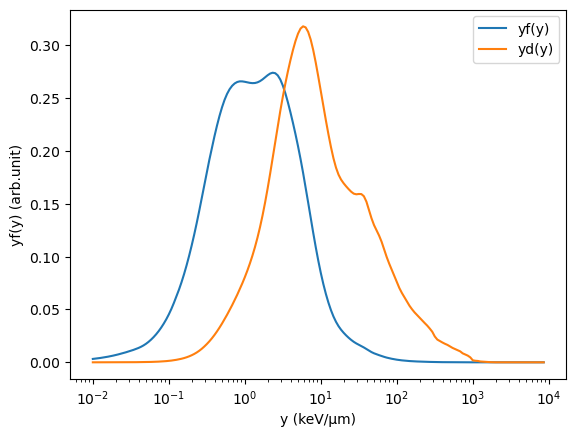

In [27]:
# graph
plt.plot(lineal_energy, yfy_distribution,label='yf(y)')
plt.plot(lineal_energy, ydy_distribution,label='yd(y)')
plt.xscale('log')
plt.xlabel('y (keV/μm)')
plt.ylabel('yf(y) (arb.unit)')
plt.legend()
plt.show()

In [28]:
# parameters
# base: HSG cells
alpha_zero       = 0.172 # Gy-1
delta_alpha_zero = 0.03 
beta             = 0.0615 # Gy-2
r                = 0.32 # μm
delta_r          = 0.04 
density_cell     = 1    # cell:water
density_Ti       = 4.52 
y_zero           = 150  # keV/μm

alpha            = [alpha_zero + beta * k/ (np.pi * density_cell * r**2) for k in dose_mean]
#didn't consider the overkill effect
print(alpha)

[3.402623087374244, 3.8990979177139624, 4.629185471455736, 7.7472079908399545, 29.60108563053382, 80.69383232155934, 6.658098592131684]


In [29]:
# y, Survival fraction, S
# x        = sp.symbols('x')
ratio    = [- i**2/y_zero**2 for i in lineal_energy]

# f の計算
# f = [(1 - np.exp(r)) * fd for r, fd in zip(ratio, frequency_distribution)]

# 各ケースの f の計算
integral_simps_all = []
for z in range(7):
    f = [(1 - np.exp(r)) * frequency_distributions[z][j] for j, r in enumerate(ratio)]
    integral_simps = simps(f, lineal_energy)
    integral_simps_all.append(integral_simps.item())

# f        = (1 - np.exp(ratio)) * frequency_distribution
# integral = sp.integrate(f,x) # 分子の積分のところ
# integral_simps = simps(f,lineal_energy) #分子の積分
# print(integral_simps)

print(integral_simps_all)

# Calculate yy and s for each case in integral_simps_all
results = []
for m in range(7):
    yy = integral_simps_all[m] * y_zero**2 / frequency_mean[m]
    results.append(yy)

surviving_fraction = []
for x in alpha:
    s = np.exp(-(x * dose - beta * dose**2))
    surviving_fraction.append(s)

print(results,surviving_fraction)

[0.0025124746868306746, 0.0030809744171448853, 0.004462905454804995, 0.01048599450970806, 0.09657832460486204, 0.262097513924925, 0.002774015021911873]
[7.233612342122863, 8.159360214896411, 10.072762838109378, 16.180980486141646, 38.52653765951095, 26.285687823984006, 9.104418057474602] [7.825403770666473e-13, 5.461902748423975e-15, 3.686498012563753e-18, 1.0597764338490572e-31, 1.3032555612994757e-126, 0.0, 5.6905766616951926e-27]


In [30]:
# RBE calculation
# base: 200 keV X-rays
# survival level: s (%)
# x: target radiation, t: test radiation

alpha_x = 0.764 # Gy-1
# alpha_t = alpha_zero + beta * yy
beta_x  = 0.0615 # Gy-2
# dose_x  = 10
'''
RBE=[]
for l in s:
    numerator   = math.sqrt(alpha_x ** 2 - 4 * beta_x *math.log(l)) - alpha_x
    #denominator = 2 * beta_x * dose_x
    denominator = math.sqrt(alpha_t ** 2 - 4 * beta *math.log(l)) - alpha_t
    coeffient   = beta / beta_x
    rbe         = numerator / denominator * coeffient # RBE の計算
    RBE.append(rbe)
print(RBE)
'''

# Calculate RBE for each yy and s
RBE_all = []
for yy in results:
    alpha_t = alpha_zero + beta * yy
    numerator = math.sqrt(alpha_x ** 2 - 4 * beta_x * math.log(0.1)) - alpha_x
    denominator = math.sqrt(alpha_t ** 2 - 4 * beta * math.log(0.1)) - alpha_t
    coefficient = beta / beta_x
    rbe = numerator / denominator * coefficient  # RBE calculation
    RBE_all.append(rbe)

RBE = []
for n in alpha:
    alpha_t = n
    numerator = math.sqrt(alpha_x ** 2 - 4 * beta_x * math.log(0.1)) - alpha_x
    denominator = math.sqrt(alpha_t ** 2 - 4 * beta * math.log(0.1)) - alpha_t
    coefficient = beta / beta_x
    rbe = numerator / denominator * coefficient  # RBE calculation
    RBE.append(rbe)
print(RBE, RBE_all)

[3.7504518626526213, 4.285552272869946, 5.074569544573188, 8.457052933827615, 32.24263885999063, 87.88253083061406, 7.274174313544208] [0.8657972030958802, 0.9169745235396414, 1.0257117046988808, 1.3917570740263743, 2.8271324032929073, 2.0305777052463934, 0.9702200030048389]


In [31]:
# Radiation quality factor Q

q_icru = [5510 / lineal_energy[a]*(1-np.exp(-5*10**-5*lineal_energy[a]**2-2*10**-7*lineal_energy[a]**3)) for a in range(len(lineal_energy))]
dose   = dose_distributions
print(dose)



q_integral = [[a * b for a, b in zip(d, q_icru)] for d in dose]
print(q_integral)


mean_q = [simps(q, lineal_energy) for q in q_integral]

print(mean_q)

[[0.0023926999999999998, 0.0025904797184663824, 0.002805386396775024, 0.0030386051314639766, 0.0032918934824187136, 0.0035674478811827223, 0.003866931667613099, 0.004192835855782154, 0.004547461846520186, 0.004933193003558363, 0.00535369476420349, 0.005811804152516873, 0.006311158883713523, 0.006855805036316041, 0.0074506590179608005, 0.00810043322897891, 0.008812124762044222, 0.009592340448615368, 0.01045062922307905, 0.011396933956777633, 0.012443123061013443, 0.013602027175322733, 0.014887743223016798, 0.01631567238251703, 0.01790287815392418, 0.019670037722555742, 0.02164237942471861, 0.023846512154897838, 0.026307566748280286, 0.028308426553794324, 0.030339999999999995, 0.03251620670494536, 0.034859764988420965, 0.03738422432282151, 0.04010740032367221, 0.043082163782531685, 0.046350558394851415, 0.0499894816805937, 0.0530631020673233, 0.05470856512805092, 0.056312662458225034, 0.057825731848858704, 0.059230064891118275, 0.06050584374884783, 0.061636959639418155, 0.062603168579831

In [32]:
#to_excel
cases = [f'case{i}' for i in range(1,8)]
dc1 = pd.DataFrame({'case':cases,'RBE from yy':RBE_all,'RBE from alpha':RBE, 'Q':mean_q})
dc1.to_excel(r'C:\Python\data\microdosimetry\carbon_ion\rbe_calculation\rbe_q_values_PMMA.xlsx')
# dc1.to_excel(r'C:\Python\data\microdosimetry\proton\RBE_calculation\RBE_Q_values_gold.xlsx')

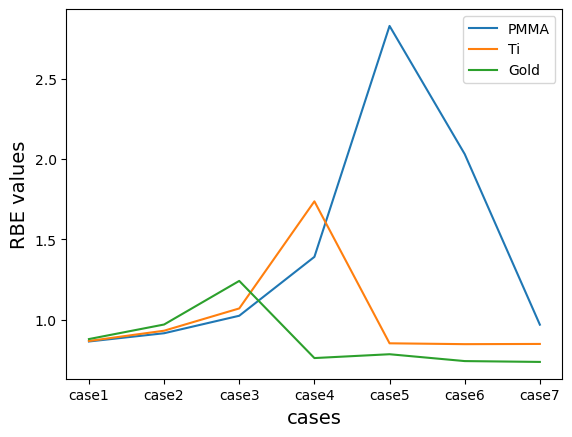

In [34]:
# dc2 = pd.read_excel(r'C:\Python\data\microdosimetry\proton\RBE_calculation\RBE_matome.xlsx')
dc2 = pd.read_excel(r'C:\Python\data\microdosimetry\carbon_ion\rbe_calculation\RBE_matome.xlsx')
x   = dc2['case']
y1  = dc2['PMMA']
y2  = dc2['Ti']
y3  = dc2['Gold']

plt.plot(x,y1,label='PMMA')
plt.plot(x,y2,label='Ti')
plt.plot(x,y3,label='Gold')
plt.xlabel('cases',fontsize=14)
plt.ylabel('RBE values',fontsize=14)
plt.legend()
plt.show()